 TP  4 : Flocon de Koch
 =====
 KABONGO BUZANGU BEN

1 - Introduction 
-----------


L'objectif de ce TP est d'étudier la fonction la convolution et de l'appliquer pour générer un Flocon de Koch

Le TP sera à réaliser en python 3. Les librairies utilisées sont installées sur les machines de l'université, vous pouvez néanmoins les installer sur vos propres machines à l'aide de l'utilitaire pip présent par défaut avec python.
	
N'hésitez pas à regarder régulièrement la documentation de ces librairies, des exemples d'utilisation accompagnent généralement l'explication de chaque fonction.

- Python 3: https://docs.python.org/3/
- Numpy: https://docs.scipy.org/doc/numpy/reference/
- Scipy: https://docs.scipy.org/doc/scipy/reference/
- Matplotilb: https://matplotlib.org/contents.html

**<span style="color:red"> À part si cela est précisé, vous ne devez pas utiliser directement de boucle (`for`,`while`) ou de branchement conditionnel (`if`) durant ce TP.</span>.**


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import scipy.signal

Afin de vous guider dans la détection d'erreur dans votre code, nous avons introduit des blocs de tests. Il n'est pas nécessaire que vous compreniez en détail le code de ces blocs. Vous devez uniquement les exécuter et corriger les erreurs de votre code si un des tests n'est pas valide. Il est important de noter que le fait de valider le test ne garantit pas que votre code ne contient pas d'erreur. Par contre un test non validé implique nécessairement que votre code contient une erreur.

- Si tous les tests sont valides, vous aurez un message écrit en vert indiquant : Ok - Tous les tests sont validés.
- Si un des tests n'est pas valide, vous aurez un message écrit en rouge indiquant : Au moins un test n'est pas validé.
- Pour les tests non valides, vous aurez des éléments d'information sur le test non valide. En particulier, un message écrit en jaune vous détaillera la nature du test échoué.

In [3]:
a = 42

In [4]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(a,42,err_msg="\033[93m {}\033[00m" .format('Test 1 : a n\'est pas égale à 42. Vérifiez que a==42'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


## 2 - Outils introductifs

### 2.1 - Étude de la convolution sur plusieurs filtres

Nous allons dans cette partie étudier l'effet de la convolution avec différents types de filtres sur des fonctions sinusoïdales. 

Définissez une variable $f=1$Hz correspondant à la fréquence d'un signal sinusoïdale.

In [5]:
f = 1

Construisez un tableau `x` contenant 2000 valeurs de $-5$ à $5$.

In [6]:
x = np.linspace(-5,5,2000)
print(x.shape)

(2000,)


In [7]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(x.shape,(2000,),err_msg="\033[93m {}\033[00m" .format('Test 1 : x n\'a pas la bonne taille.'))
    np.testing.assert_equal(x[0],-5,err_msg="\033[93m {}\033[00m" .format('Test 2 : La première valeur de x est fausse.'))
    np.testing.assert_equal(x[-1],5,err_msg="\033[93m {}\033[00m" .format('Test 3 : La dernière valeur de x est fausse.'))
    np.testing.assert_almost_equal(x[42],-4.789894947473737,err_msg="\033[93m {}\033[00m" .format('Test 4 : La 42 valeur de x est fausse.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)  
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Construisez un tableau `y1` correspondant à l'équation $\sin(2\pi f x)$.   

In [8]:
y1 = np.sin(2 * np.pi * f * x)

In [9]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(y1.shape,(2000,),err_msg="\033[93m {}\033[00m" .format('Test 1 : y1 n\'a pas la bonne taille.'))
    np.testing.assert_almost_equal(y1[0],1.22464680e-15,err_msg="\033[93m {}\033[00m" .format('Test 2 : La première valeur de y1 est fausse.'))
    np.testing.assert_almost_equal(y1[-1],1.22464680e-15,err_msg="\033[93m {}\033[00m" .format('Test 3 : La dernière valeur de y1 est fausse.'))
    np.testing.assert_almost_equal(y1[64],0.9043983406927987,err_msg="\033[93m {}\033[00m" .format('Test 4 : La 64 valeur de y1 est fausse.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)  
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


#### 2.1.1 Filtrage par un filtre porte

Définissez un vecteur aléatoire $e$ tiré selon une loi normale, de même taille que le tableau $x$.<br>
Définissez et affichez la variable $y1e=y1+0.1e $. 

In [20]:
e = np.random.standard_normal(x.shape)
y1e = y1 + .1 * e

In [21]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(y1e.shape,(2000,),err_msg="\033[93m {}\033[00m" .format('Test 1 : y1e n\'a pas la bonne taille.'))
    np.testing.assert_array_less(np.mean(np.abs(y1-y1e)),1e-1,err_msg="\033[93m {}\033[00m" .format('Test 2 : La moyenne du bruit n\'est pas correcte.'))
    np.testing.assert_array_less(np.abs(0.1-np.std(np.abs(y1-y1e))),1e-1,err_msg="\033[93m {}\033[00m" .format('Test 3 : L\'écart type du bruit n\'est pas correcte.'))
    np.testing.assert_array_less(1e-1,np.max(np.abs(y1-y1e)),err_msg="\033[93m {}\033[00m" .format('Test 4 : Vérifiez que votre bruit suit bien une loi normale et non une loi uniforme.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)  
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Construisez et affichez un filtre `filtrePorte` défini par: $$\left\{
	\begin{array}{ll}
	1 &\text{ si }  |x|<s\\
	0 &\text{ sinon }
\end{array}\right. $$
Vous pouvez fixer le seuil $s$ à $10^{-1}$.

In [22]:
s = .1
filtrePorte = np.abs(x) < s

In [23]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(filtrePorte.shape,(2000,),err_msg="\033[93m {}\033[00m" .format('Test 1 : filtrePorte n\'a pas la bonne taille.'))
    np.testing.assert_equal(np.sum(filtrePorte!=1)+np.sum(filtrePorte==1),2000,err_msg="\033[93m {}\033[00m" .format('Test 2 : Il ne doit pas avoir de valeurs autres que 0 et 1.'))
    np.testing.assert_equal(np.sum(filtrePorte),40,err_msg="\033[93m {}\033[00m" .format('Test 3 : La zone a 1 n\'est pas de la bonne taille.'))
    np.testing.assert_equal(np.sum(filtrePorte[980:(980+40)]),40,err_msg="\033[93m {}\033[00m" .format('Test 4 : La zone a 1 n\'est pas au bon endroit.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)  
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Il est possible de supprimer le bruit du signal `y1e` en utilisant un filtre moyenneur tel que la porte précédemment définie.

En utilisant la fonction `sc.signal.convolve` de scipy (avec le paramètre `'same'`), convoluez le signal `y1e` avec `filtrePorte` pour donner le vecteur `y1f`.  Divisez le résultat par le maximum de la valeur absolue de ses valeurs (afin d'avoir des valeurs dans l'intervalle $[-1,1]$). Affichez le résultat ainsi normalisé sur une figure. Que constatez-vous par rapport au signal `y1` ? 

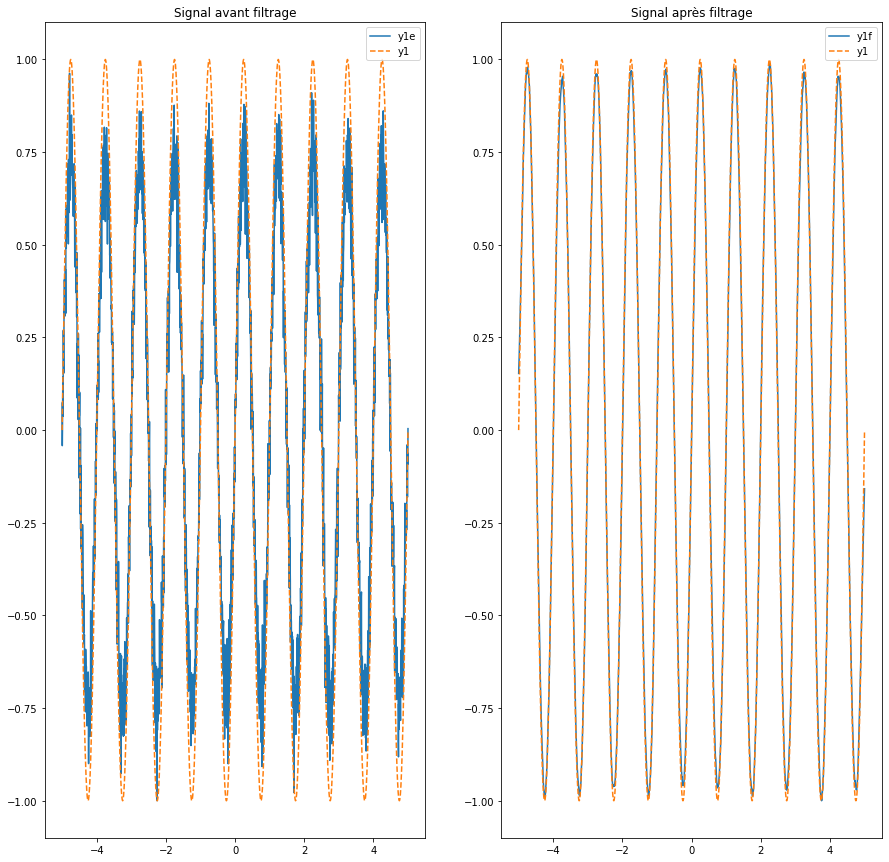

In [24]:
y1f = sc.signal.convolve(y1e,filtrePorte,"same")

fig, axs = plt.subplots(1,2,figsize=(15,15))
axs[0].plot(x,y1e/np.max(np.abs(y1e)))
axs[0].plot(x,y1,'--')
axs[0].legend(('y1e','y1'))
axs[0].set_title('Signal avant filtrage')

axs[1].plot(x,y1f/np.max(np.abs(y1f)))
axs[1].plot(x,y1,'--')
axs[1].legend(('y1f','y1'))
axs[1].set_title('Signal après filtrage')
plt.show()

In [25]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(y1f.shape,(2000,),err_msg="\033[93m {}\033[00m" .format('Test 1 : y1f n\'a pas la bonne taille.'))
    np.testing.assert_array_less(np.mean(np.abs(y1-y1f/np.max(y1f))),5e-2,err_msg="\033[93m {}\033[00m" .format('Test 2 : Le filtrage est probablement faux.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)  
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


#### 2.1.2 Filtrage par un filtre sinus cardinal

Le filtrage par un sinus cardinal permet de faire un filtre passe-bas qui ne laisse passer que les fréquences inférieures à une fréquence de coupure. On va illustrer ce phénomène ici en combinant deux signaux sinusoïdaux de fréquences différentes puis en appliquant un filtrage avec une fréquence de coupure bien choisie pour ne laisser passer qu'un des deux signaux d'origine.

Construisez un tableau `y2` correspondant à l'équation $\sin(2\pi 2f x)$.

In [26]:
y2 = np.sin(2*np.pi*2*f*x)

In [27]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(y2.shape,(2000,),err_msg="\033[93m {}\033[00m" .format('Test 1 : y2 n\'a pas la bonne taille.'))
    np.testing.assert_almost_equal(y2[0],1.22464680e-15,err_msg="\033[93m {}\033[00m" .format('Test 2 : La première valeur de y2 est fausse.'))
    np.testing.assert_almost_equal(y2[-1],1.22464680e-15,err_msg="\033[93m {}\033[00m" .format('Test 3 : La dernière valeur de y2 est fausse.'))
    np.testing.assert_almost_equal(np.sum(np.abs(y2)),1272.6026630324313,err_msg="\033[93m {}\033[00m" .format('Test 4 : Certaines valeurs de y2 sont fausses.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)  
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Affichez `y1` et `y2` sur deux figures différentes.

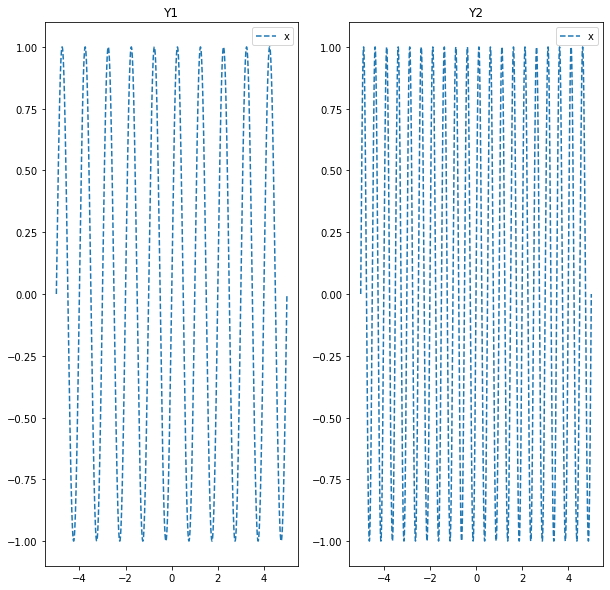

In [43]:
fig, axs = plt.subplots(1,2,figsize=(10,10))
axs[0].plot(x,y1,'--')
axs[0].legend(('x', 'y1'))
axs[0].set_title('Y1')

axs[1].plot(x,y2,'--')
axs[1].legend(('x','y2'))
axs[1].set_title('Y2')
plt.show()

Définissez et affichez la fonction $y12=\frac{y1+y2}{\max(y1+y2)}$. Ce signal correspond à la combinaison des deux signaux sinusoïdaux `y1` et `y2`.

In [34]:
y12 = (y1+y2)/np.max(y1+y2)

In [35]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(y12.shape,(2000,),err_msg="\033[93m {}\033[00m" .format('Test 1 : y12 n\'a pas la bonne taille.'))
    np.testing.assert_almost_equal(y12[0],2.0872629244849403e-15,err_msg="\033[93m {}\033[00m" .format('Test 2 : La première valeur de y12 est fausse.'))
    np.testing.assert_almost_equal(y12[-1],-2.0872629244849403e-15,err_msg="\033[93m {}\033[00m" .format('Test 3 : La dernière valeur de y12 est fausse.'))
    np.testing.assert_almost_equal(np.sum(np.abs(y12)),903.748871217134,err_msg="\033[93m {}\033[00m" .format('Test 4 : Certaines valeurs de y12 sont fausses.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)  
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Construisez un filtre `filtreSinc` défini par:
	$$\text{sinc}(2f_s x) $$
	$\text{sinc}$ est le sinus cardinal défini dans numpy. Vous pouvez fixer la fréquence $f_s$ à $1.5$. La taille de ce vecteur sera la même que `x`.

In [36]:
fs = 1.5
filtreSinc = np.sinc(2*fs*x)

In [37]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(filtreSinc.shape,x.shape,err_msg="\033[93m {}\033[00m" .format('Test 1 : filtreSinc n\'a pas la bonne taille.'))
    np.testing.assert_almost_equal(filtreSinc[0],1.1437264410803267e-16,err_msg="\033[93m {}\033[00m" .format('Test 2 : La première valeur de filtreSinc est fausse.'))
    np.testing.assert_almost_equal(filtreSinc[1000],0.9999073824352694,err_msg="\033[93m {}\033[00m" .format('Test 3 : La valeur du milieu de filtreSinc est fausse.'))
    np.testing.assert_almost_equal(np.sum(np.abs(filtreSinc)),151.25737208804696,err_msg="\033[93m {}\033[00m" .format('Test 4 : Certaines valeurs de y12 sont fausses.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)  
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Affichez dans une même figure les filtres `filtrePorte` et `filtreSinc`.

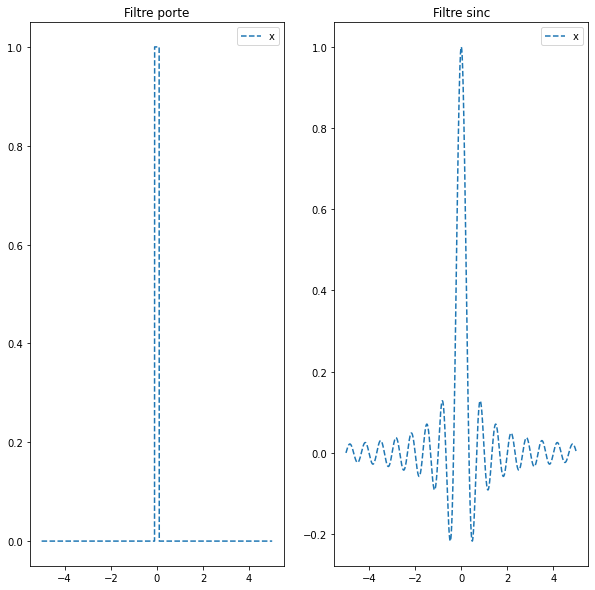

In [42]:
fig, axs = plt.subplots(1,2,figsize=(10,10))
axs[0].plot(x,filtrePorte,'--')
axs[0].legend(('x', 'filtrePorte'))
axs[0].set_title('Filtre porte')

axs[1].plot(x,filtreSinc,'--')
axs[1].legend(('x','filtreSinc'))
axs[1].set_title('Filtre sinc')
plt.show()

En utilisant la fonction `sc.signal.convolve` de scipy (avec le paramètre `'same'`), convoluez le signal `y12` avec `filtreSinc`.  Divisez le résultat par la valeur maximale  et affichez le sur une figure. Que constatez-vous par rapport au signal `y1` ? 

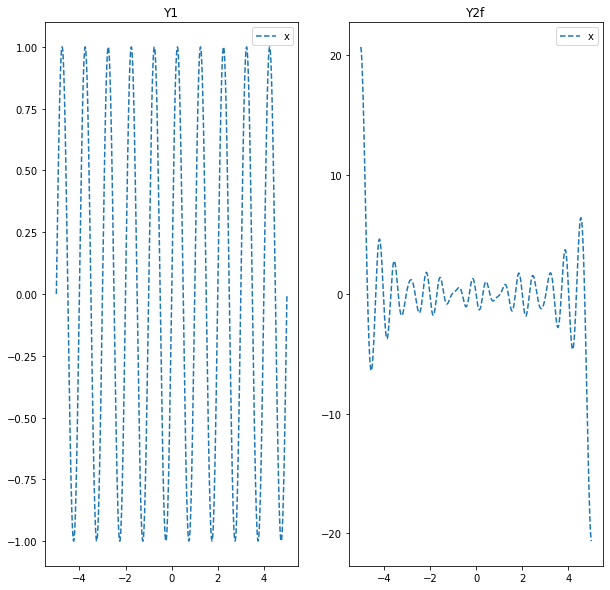

In [41]:
y2f = sc.signal.convolve(y2,filtreSinc,'same')

fig, axs = plt.subplots(1,2,figsize=(10,10))
axs[0].plot(x,y1,'--')
axs[0].legend(('x', 'y1'))
axs[0].set_title('Y1')

axs[1].plot(x,y2f,'--')
axs[1].legend(('x','y2f'))
axs[1].set_title('Y2f')
plt.show()

### 2.2 Rotation

Nous allons dans cette partie étudier comment faire des rotations de points dans le plan 2D.
Cela nous sera utile pour construire le flocon de Koch dans la suite du TP.

Déclarez un tableau `x` de taille 2 par 2 contenant les points de coordonnées (0,0) et (1,1). Une ligne du tableau correspondra à un point.

In [4]:
x = np.array([[0,0],[1,1]])

In [46]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(x.shape,(2,2),err_msg="\033[93m {}\033[00m" .format('Test 1 : x n\'a pas la bonne taille.'))
    np.testing.assert_equal(x.reshape(-1),[0,0,1,1],err_msg="\033[93m {}\033[00m" .format('Test 2 : Les valeurs de x ne sont pas correctes.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)  
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Affichez les deux points précédents reliés par une droite.

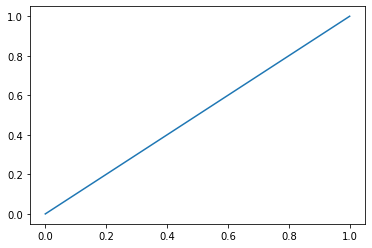

In [125]:
plt.plot(x[:,0],x[:,1])
plt.show()

Définissez une fonction `get_rotation_matrix` qui prend en argument un angle `t` et qui retourne la matrice $\left[ \begin{array}{cc}\cos(t)&\sin(t)\\
-sin(t)&cos(t)
\end{array} \right]$.

In [5]:
def get_rotation_matrix(t):
  return np.array([[np.cos(t), np.sin(t)], [-np.sin(t), np.cos(t)]])

In [49]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    _x_ = np.random.rand(int(1e3))*2*np.pi
    for i in range(len(_x_)):
        tmp = get_rotation_matrix(_x_[i])
        tmp2 = tmp**2
        np.testing.assert_almost_equal(np.sum(np.diag(tmp2))+np.sum(np.diag(tmp2[::-1,:])),2,err_msg="\033[93m {}\033[00m" .format('Test 1 : get_rotation_matrix ne retourne pas une matrice de rotation.'))
        np.testing.assert_almost_equal(np.prod(np.diag(tmp))-np.prod(np.diag(tmp[::-1,:])),1,err_msg="\033[93m {}\033[00m" .format('Test 2 : get_rotation_matrix ne retourne pas une matrice de rotation.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)  
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

del _x_,tmp,tmp2

 Ok - Tous les tests sont validés.


Faire la rotation de centre (0,0) d'un point `a` par un angle $t$ revient à multiplier le vecteur ligne contenant les coordonnées de `a` par la matrice de rotation de la question précédente. Attention, on parle ici de produit matriciel et non d'un produit terme à terme. 

En utilisant la fonction `get_rotation_matrix`, faites une rotation de $\dfrac{\pi}{3}$ des points (0,0) et (1,1) que vous aviez stockés dans la variable `x`. Vous stockerez le résultat dans une variable `xr`.

In [50]:
xr = x.dot(get_rotation_matrix(np.pi/3))

In [51]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_almost_equal(xr,np.array([[0,0],[-0.3660254,  1.3660254]]),err_msg="\033[93m {}\033[00m" .format('Test 1 : les points de xr ne sont pas corrects.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)  
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Affichez le segment allant du point (0,0) au point (1,1) ainsi que la rotation de ce segment d'un angle de $\dfrac{\pi}{3}$.

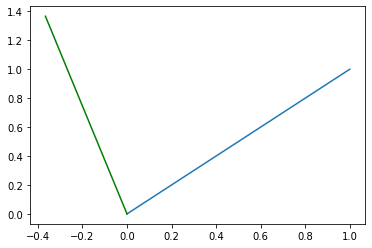

In [126]:
plt.plot(x[:,0],x[:,1])
plt.plot(xr[:,0],xr[:,1],color="green")
plt.show()

En utilisant une boucle `for` affichez 10 rotations successives partant du segment allant du point (0,0) au point (1,1) tel que les angles entre chaque rotation soient les mêmes et que la dernière rotation vous ramène sur le segment initial.

In [127]:
for i in range(11):
  t = .2 * i * np.pi
  xrt = x.dot(get_rotation_matrix(t))
  print(xrt)  


[[0. 0.]
 [1. 1.]]
[[0.         0.        ]
 [0.22123174 1.39680225]]
[[ 0.          0.        ]
 [-0.64203952  1.26007351]]
[[ 0.          0.        ]
 [-1.26007351  0.64203952]]
[[ 0.          0.        ]
 [-1.39680225 -0.22123174]]
[[ 0.  0.]
 [-1. -1.]]
[[ 0.          0.        ]
 [-0.22123174 -1.39680225]]
[[ 0.          0.        ]
 [ 0.64203952 -1.26007351]]
[[ 0.          0.        ]
 [ 1.26007351 -0.64203952]]
[[0.         0.        ]
 [1.39680225 0.22123174]]
[[0. 0.]
 [1. 1.]]


Dans le cas où la rotation n'est pas centrée sur l'origine mais correspond à un centre de coordonnée `c`, il faut calculer $(x-c)R+c$ au lieu de $xR$. Faites une rotation du segment (0,0)-(1,1) d'un angle de $\dfrac{\pi}{3}$ par rapport au centre de coordonnée (2,1). Vous placerez le résultat dans la variable `xr2`.

In [128]:
c = np.array([2,1])
xr2 = (x-c).dot(get_rotation_matrix(np.pi/3)) + c

In [129]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_almost_equal(xr2,np.array([[ 1.8660254, -1.2320508],[ 1.5      ,  0.1339746]]),err_msg="\033[93m {}\033[00m" .format('Test 1 : les points de xr2 ne sont pas corrects.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)  
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


### 2.2 - Division en trois d'un segment

Soit un segment défini par deux points $p_1$ et $p_2$ alors le point se trouvant à 1/3 du segment $[p_1,p_2]$ est le point $p_{1/3}=p_1+\dfrac{p_2-p_1}{3} = 2\dfrac{p_1}{3} + \dfrac{p_2}{3}$. En utilisant `x` (qui stocke les points $(0,0)$ et $(1,1)$), calculez ce point pour le segment $(0,0)-(1,1)$. Vous nommerez le résultat `x1_3`.

In [7]:
x1_3 = (2*x[0]/3) + (x[1]/3)

In [7]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_almost_equal(x1_3,np.ones(2)/3,err_msg="\033[93m {}\033[00m" .format('Test 1 : le point de x1_3 n\'est pas correct.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)  
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Faites de même pour le point se trouvant au 2/3 du segment que vous nommerez `x2_3`. 

In [8]:
x2_3 = x[0] + (2*(x[1]-x[0])/3)

In [11]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_almost_equal(x2_3,np.ones(2)*2/3,err_msg="\033[93m {}\033[00m" .format('Test 1 : le point de x2_3 n\'est pas correct.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)  
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


En utilisant un opérateur de concaténation sur les lignes, concaténez la valeur d'un tableau ligne contenant (0,0) avec `x1_3`,`x2_3` et la dernière ligne de `x` afin d'avoir une matrice de taille 4 par 2 que vous nommerez `x_end`.

In [9]:
x_end = np.concatenate(([x[0]], [x1_3], [x2_3], [x[1]]))
print(x_end)

[[0.         0.        ]
 [0.33333333 0.33333333]
 [0.66666667 0.66666667]
 [1.         1.        ]]


In [13]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(x_end.shape,(4,2),err_msg="\033[93m {}\033[00m" .format('Test 1 : Les dimensions de x_end ne sont pas correctes.'))
    np.testing.assert_almost_equal(x_end[0,:],np.zeros(2),err_msg="\033[93m {}\033[00m" .format('Test 2 : Le premier point doit être le point (0,0).'))
    np.testing.assert_almost_equal(x_end[1,:],x1_3,err_msg="\033[93m {}\033[00m" .format('Test 3 : Le deuxième point doit être le point x1_3.'))
    np.testing.assert_almost_equal(x_end[2,:],x2_3,err_msg="\033[93m {}\033[00m" .format('Test 4 : Le troisième point doit être le point x2_3.'))
    np.testing.assert_almost_equal(x_end[3,:],np.ones(2),err_msg="\033[93m {}\033[00m" .format('Test 5 : Le dernier point doit être le point (1,1).'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)  
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Affichez les points de la question précédente

In [136]:
print(x_end)

[[0.         0.        ]
 [0.33333333 0.33333333]
 [0.66666667 0.66666667]
 [1.         1.        ]]


## 3 - Construction d'un flocon de Koch

Le flocon de Koch est une des premières figures fractales de l'histoire. Il a été proposé par le mathématicien suédois Helge von Koch en 1904. 

Sa construction consiste à répéter un processus itératif simple afin de construire une certaine figure. À chaque itération, on applique à tous les segments les opérations suivantes:
- on découpe les segments en trois parties égales
- on fait une rotation de -60° de la partie centrale par rapport à son sommet gauche.
- on relie le point créé par la rotation et le point à 2/3 du segment.

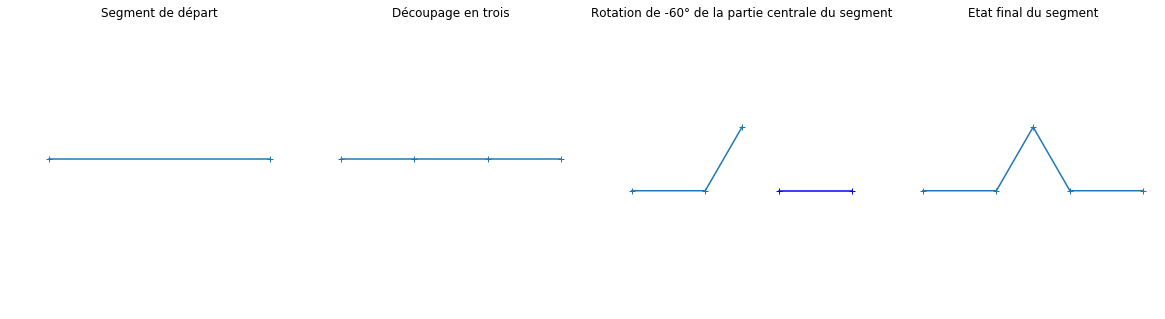

### 3.1 - Première étape de la construction d'un Flocon de Koch

Calculez le point `xm2` correspondant à la rotation du point `x2_3` par rapport au point x1_3 et d'angle $\dfrac{\pi}{3}$. 

In [10]:
def rotate(pt, angle, o=None):
  if o is None:
    return pt.dot(get_rotation_matrix(angle))
  return (pt-o).dot(get_rotation_matrix(angle))+o

xm2 = rotate(x2_3, np.pi/3, x1_3)

In [15]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(xm2.shape,(2,),err_msg="\033[93m {}\033[00m" .format('Test 1 : Les dimensions de xm2 ne sont pas correctes.'))
    np.testing.assert_almost_equal(xm2,np.array([0.2113249, 0.7886751]),err_msg="\033[93m {}\033[00m" .format('Test 2 : Les coordonnées du point xm2 ne sont pas correctes.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)  
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


En reprenant le code que vous avez utilisé pour construire `x_end`, faites maintenant en sorte d'avoir une matrice contenant le point (0,0), x1_3, xm2, x2_3 et la dernière ligne de x.

In [16]:
x_end = np.concatenate(([x[0]], [x1_3], [xm2], [x2_3], [x[1]]))

In [17]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(x_end.shape,(5,2),err_msg="\033[93m {}\033[00m" .format('Test 1 : Les dimensions de x_end ne sont pas correctes.'))
    np.testing.assert_almost_equal(x_end[0,:],np.zeros(2),err_msg="\033[93m {}\033[00m" .format('Test 2 : Le premier point doit être le point (0,0).'))
    np.testing.assert_almost_equal(x_end[1,:],x1_3,err_msg="\033[93m {}\033[00m" .format('Test 3 : Le deuxième point doit être le point x1_3.'))
    np.testing.assert_almost_equal(x_end[2,:],xm2,err_msg="\033[93m {}\033[00m" .format('Test 4 : Le troisième point doit être le point xm2.'))    
    np.testing.assert_almost_equal(x_end[3,:],x2_3,err_msg="\033[93m {}\033[00m" .format('Test 5 : Le quatrième point doit être le point x2_3.'))
    np.testing.assert_almost_equal(x_end[4,:],np.ones(2),err_msg="\033[93m {}\033[00m" .format('Test 6 : Le dernier point doit être le point (1,1).'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)  
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Nous allons maintenant généraliser les étapes que nous venons de faire pour construire les différentes itérations d'un flocon de Koch.

Renommez la matrice `x_end` en `x1`. Cette matrice correspond à un flocon de Koch après une itération de construction.

In [18]:
x1 = x_end

In [19]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(x1.shape,(5,2),err_msg="\033[93m {}\033[00m" .format('Test 1 : Les dimensions de x1 ne sont pas correctes.'))
    np.testing.assert_equal(np.sum(x1),5,err_msg="\033[93m {}\033[00m" .format('Test 2 : La nouvelle valeur de x1 n\'est pas correcte.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)  
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


La première étape que nous avions faite pour l'itération 1, consistait à calculer le point se trouvant à 1/3 du segment. Nous allons maintenant généraliser cela à tous les segments. Afin de réaliser cela, vous calculerez `x1_3` en utilisant une convolution 2D entre la matrice `x1` et la matrice colonne $\left[\begin{array}{c}\dfrac{1}{3}\\
\dfrac{2}{3}
\end{array}
\right]$ de taille $(2,1)$. Vous ajouterez l'argument `'same'` à la convolution.

In [20]:
c = np.array([[1/3],[2/3]])
x1_3 = sc.signal.convolve(x1,c,'same')

In [21]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(x1_3.shape,(5,2),err_msg="\033[93m {}\033[00m" .format('Test 1 : Les dimensions de x1_3 ne sont pas correctes.'))
    np.testing.assert_almost_equal(x1_3,np.array([[0.        , 0.        ],
       [0.11111111, 0.11111111],
       [0.29266384, 0.48511393],
       [0.36310547, 0.74800565],
       [0.77777778, 0.77777778]]),
    err_msg="\033[93m {}\033[00m" .format('Test 2 : La nouvelle valeur de x1_3 n\'est pas correcte.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)  
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


En utilisant un mécanisme similaire à la question précédente, calculez `x2_3` correspondant à la liste des points se trouvant à 2/3 de chaque segment.

In [22]:
c = np.array([[2/3],[1/3]])
x2_3 = sc.signal.convolve(x1,c,'same')

In [23]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(x2_3.shape,(5,2),err_msg="\033[93m {}\033[00m" .format('Test 1 : Les dimensions de x2_3 ne sont pas correctes.'))
    np.testing.assert_almost_equal(np.sum(x2_3),4+1/3,err_msg="\033[93m {}\033[00m" .format('Test 2 : La nouvelle valeur de x2_3 n\'est pas correcte.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)  
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Affichez sur la même figure le flocon de Koch à l'étape 1, les points `x1_3` en rouge et les points `x2_3` en vert.

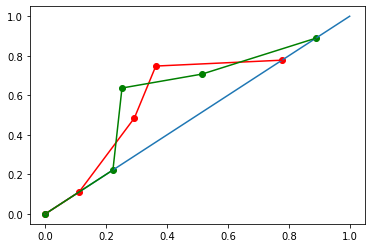

In [24]:
plt.plot(x[:,0],x[:,1])
plt.scatter(x1_3[:,0],x1_3[:,1], color="red")
plt.plot(x1_3[:,0],x1_3[:,1], color="red")
plt.scatter(x2_3[:,0],x2_3[:,1], color="green")
plt.plot(x2_3[:,0],x2_3[:,1], color="green")
plt.show()

Calculez `x1bis` correspondant à `x1` sans sa dernière ligne.  

In [27]:
x1bis = np.delete(x1,-1,axis=0)

In [28]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(x1bis.shape,(x1.shape[0]-1,x1.shape[1]),err_msg="\033[93m {}\033[00m" .format('Test 1 : Les dimensions de x1bis ne sont pas correctes.'))
    np.testing.assert_almost_equal(x1bis,np.array([[0.      , 0.      ],
       [0.3333333, 0.3333333],
       [0.2113249, 0.7886751],
       [0.6666667, 0.6666667]]),err_msg="\033[93m {}\033[00m" .format('Test 2 : Les valeurs de x1bis ne sont pas correctes.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)  
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Calculez `x1_3bis` correspondant à `x1_3` sans sa première ligne et `x2_3bis` correspondant à `x2_3` sans sa première ligne.

In [29]:
x1_3bis = np.delete(x1_3,0,axis=0)
x2_3bis = np.delete(x2_3,0,axis=0)

In [30]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(x1_3bis.shape,(x1_3.shape[0]-1,x1_3.shape[1]),err_msg="\033[93m {}\033[00m" .format('Test 1 : Les dimensions de x1_3bis ne sont pas correctes.'))
    np.testing.assert_almost_equal(x1_3bis,np.array([[0.11111111, 0.11111111],
       [0.29266384, 0.48511393],
       [0.36310547, 0.74800565],
       [0.77777778, 0.77777778]]),err_msg="\033[93m {}\033[00m" .format('Test 2 : Les valeurs de x1_3bis ne sont pas correctes.'))
    np.testing.assert_almost_equal(x2_3bis,np.array([[0.22222222, 0.22222222],
       [0.25199435, 0.63689453],
       [0.51488607, 0.70733616],
       [0.88888889, 0.88888889]]),err_msg="\033[93m {}\033[00m" .format('Test 2 : Les valeurs de x2_3bis ne sont pas correctes.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)  
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Calculez les rotations des points de `x2_3bis` par rapport au centre de `x1_3bis` pour un angle de $\dfrac{\pi}{3}$. Pour le point à la ligne $i$ dans `x2_3bis` vous utiliserez le centre à la ligne $i$ de `x1_3bis` . Le résultat sera stocké dans la variable `xm2`.

In [32]:
xm2 = rotate(x2_3bis, np.pi/3, x1_3bis)

In [33]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(xm2.shape,(x1_3.shape[0]-1,x1_3.shape[1]),err_msg="\033[93m {}\033[00m" .format('Test 1 : Les dimensions de xm2 ne sont pas correctes.'))
    np.testing.assert_almost_equal(xm2,np.array([[0.07044162, 0.26289171],
       [0.14088324, 0.52578342],
       [0.47421658, 0.85911676],
       [0.73710829, 0.92955838]]),err_msg="\033[93m {}\033[00m" .format('Test 2 : Les valeurs de xm2 ne sont pas correctes.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)  
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Affichez sur la même figure le flocon de Koch à l'étape 1, les points `x1_3` en rouge, les points `x2_3` en vert et les points `x2m` en magenta. Vous devriez obtenir le résultat suivant:

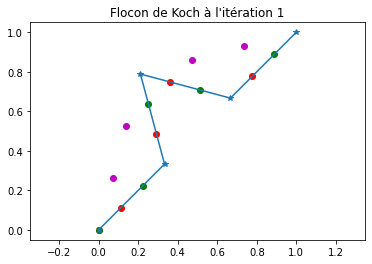

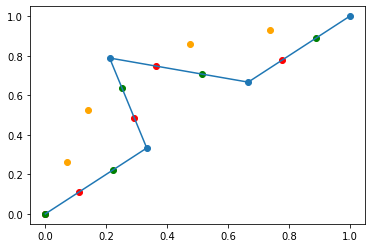

In [34]:
plt.plot(x1[:,0],x1[:,1])
plt.scatter(x1[:,0],x1[:,1])
plt.scatter(x1_3[:,0],x1_3[:,1],color='red')
plt.scatter(x2_3[:,0],x2_3[:,1],color='green')
plt.scatter(xm2[:,0],xm2[:,1],color='orange')
plt.show()

Les étapes qui vont suivre permette de fusionner les différents points que nous avons calculé en une seule figure tel que les points soient correctement ordonnés pour être affiché correctement.

Commencez par concaténer selon les lignes les matrices `x1bis, x1_3bis, xm2 ` et `x2_3bis`. Respectez l'ordre donné. Le résultat sera stocké dans `x_end`.

In [43]:
x_end = np.concatenate((x1bis,x1_3bis,xm2,x2_3bis))

In [44]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(x_end.shape,(16,2),err_msg="\033[93m {}\033[00m" .format('Test 1 : Les nouvelles dimensions de x_end ne sont pas correctes.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)  
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Redimensionnez `x_end` pour avoir un tenseur de 3 dimensions ayant 4 lignes et 2 de profondeur. Le nombre de colonnes devra être calculé automatiquement par numpy.  

In [45]:
x_end = x_end.reshape((4,-1,2))
print(x_end.shape)

(4, 4, 2)


In [46]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(x_end.shape,(4,4,2),err_msg="\033[93m {}\033[00m" .format('Test 1 : Les dimensions de x_end après redimensionnement ne sont pas correctes.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)  
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Échangez les lignes et les colonnes de `x_end`.

In [47]:
x_end = x_end.swapaxes(0,1)

In [48]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(x_end.shape,(4,4,2),err_msg="\033[93m {}\033[00m" .format('Test 1 : Les dimensions de x_end ne sont pas correctes.'))
    np.testing.assert_almost_equal(x_end,np.array( [[[0.   ,      0.        ],
  [0.11111111, 0.11111111],
  [0.07044162, 0.26289171],
  [0.22222222, 0.22222222]],
 [[0.33333333, 0.33333333],
  [0.29266384 ,0.48511393],
  [0.14088324, 0.52578342],
  [0.25199435, 0.63689453]],
 [[0.21132487, 0.78867513],
  [0.36310547, 0.74800565],
  [0.47421658, 0.85911676],
  [0.51488607, 0.70733616]],
 [[0.66666667, 0.66666667],
  [0.77777778, 0.77777778],
  [0.73710829, 0.92955838],
  [0.88888889, 0.88888889]]]

),err_msg="\033[93m {}\033[00m" .format('Test 2 : Les valeurs de x_end ne sont pas correctes.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)  
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Redimensionnez `x_end` pour avoir une matrice de 2 colonnes.

In [49]:
x_end = x_end.reshape(-1,2)

In [50]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(x_end.shape,(4*4,2),err_msg="\033[93m {}\033[00m" .format('Test 1 : Les dimensions de x_end ne sont pas correctes.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)  
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Insérez à la fin de `x_end` la dernière ligne de `x1`.

In [51]:
x_end = np.append(x_end, x1[-1]).reshape(-1,2)
print(x_end.shape)

(17, 2)


In [52]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(x_end.shape,(17,2),err_msg="\033[93m {}\033[00m" .format('Test 1 : Les dimensions de x_end ne sont pas correctes.'))
    np.testing.assert_almost_equal(x_end,np.array( [[0.   ,      0.        ],
  [0.11111111, 0.11111111],
  [0.07044162, 0.26289171],
  [0.22222222, 0.22222222],
  [0.33333333, 0.33333333],
  [0.29266384 ,0.48511393],
  [0.14088324, 0.52578342],
  [0.25199435, 0.63689453],
  [0.21132487, 0.78867513],
  [0.36310547, 0.74800565],
  [0.47421658, 0.85911676],
  [0.51488607, 0.70733616],
  [0.66666667, 0.66666667],
  [0.77777778, 0.77777778],
  [0.73710829, 0.92955838],
  [0.88888889, 0.88888889],
  [1,1]]),err_msg="\033[93m {}\033[00m" .format('Test 2 : Les valeurs de x_end ne sont pas correctes.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)  
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Affichez les points de `x_end`. Nous avons maintenant la deuxième itération d'un flocon de Koch.

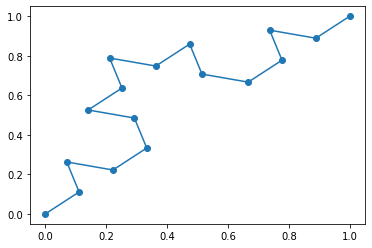

In [53]:
plt.scatter(x_end[:,0],x_end[:,1])
plt.plot(x_end[:,0],x_end[:,1])
plt.show()

Écrivez une fonction permettant de calculer un flocon de Koch après `n` itération. Testez avec `n=6`

In [11]:
def koch_n(x=np.array([[0,0],[1,1]]),t = 2*np.pi/3,n=6):
    x1_3 = (2*x[0]/3) + (x[1]/3)
    x2_3 = x[0] + (2*(x[1]-x[0])/3)
    xm2 = rotate(x2_3,t,x1_3)
    x_end = np.concatenate(([x[0]], [x1_3], [xm2], [x2_3], [x[1]]))
    for i in range(n):
      x1 = x_end
      c = np.array([[1/3],[2/3]])
      x1_3 = sc.signal.convolve(x1,c,'same')
      c = np.array([[2/3],[1/3]])
      x2_3 = sc.signal.convolve(x1,c,'same')
      x1bis = np.delete(x1,-1,axis=0)
      x1_3bis = np.delete(x1_3,0,axis=0)
      x2_3bis = np.delete(x2_3,0,axis=0)
      xm2 = rotate(x2_3bis,t,x1_3bis)
      x_end = np.concatenate((x1bis,x1_3bis,xm2,x2_3bis))
      x_end = x_end.reshape((4,-1,2))
      x_end = x_end.swapaxes(0,1)
      x_end = x_end.reshape(-1,2)
      x_end = np.append(x_end, x1[-1]).reshape(-1,2)
    return x_end

In [ ]:
f = koch_n()

plt.figure(figsize=(10,10))
plt.plot(f[:,0],f[:,1])
plt.axis('equal')
plt.title('Flocon de Koch à l\'itération 6')
plt.show()

Exemples des figures obtenues après plusieurs itérations:

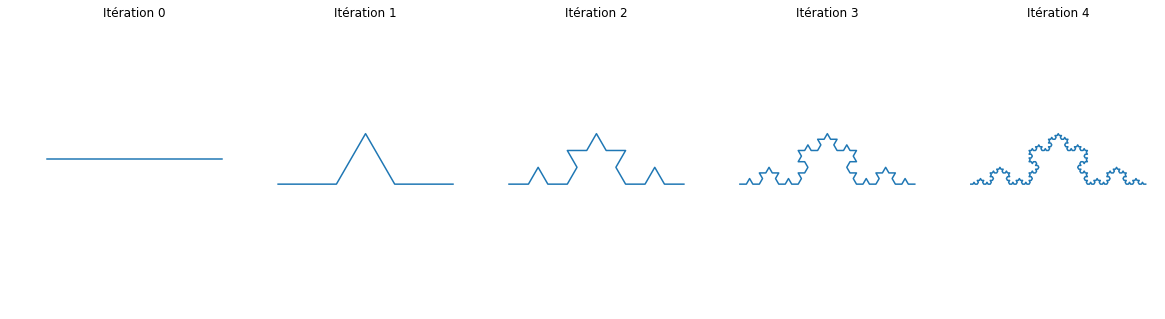